In [1]:
import ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True, formatter={'float': '{:.2f}'.format})

ONLY NUMERICAL FEATURES

In [3]:
numeric = pd.read_csv('data/numeric.csv')
X, y = numeric.iloc[:, :-1], numeric['popularity']

In [4]:
ridge_reg = ridge.RidgeRegression(alpha=1, n_splits=5, random_state=51)
ridge_reg.fit(X, y)
print(ridge_reg.rmse)

[16.03 16.09 16.18 15.93 16.11]


In [5]:
alphas = []
rmses = []
coefficients = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge_reg = ridge.RidgeRegression(alpha=alpha, n_splits=5, random_state=51)
    ridge_reg.fit(X, y)

    rmse = ridge_reg.rmse
    coeffs = ridge_reg.weights

    alphas.append(alpha)
    rmses.append(rmse)
    coefficients.append(coeffs)

alphas, rmses, coefficients

([0.01, 0.1, 1, 10, 100],
 [array([16.03, 16.09, 16.18, 15.93, 16.11]),
  array([16.03, 16.09, 16.18, 15.93, 16.11]),
  array([16.03, 16.09, 16.18, 15.93, 16.11]),
  array([16.03, 16.09, 16.18, 15.92, 16.11]),
  array([16.06, 16.12, 16.21, 15.95, 16.12])],
 [array([48.00, -0.00, 4.72, 11.49, -8.28, 0.03, 0.11, -0.99, -19.57, -3.07,
         -10.26, -2.92, -6.58, -0.01, 0.40]),
  array([47.99, -0.00, 4.72, 11.49, -8.27, 0.03, 0.11, -0.99, -19.57, -3.06,
         -10.26, -2.92, -6.58, -0.01, 0.40]),
  array([47.86, -0.00, 4.72, 11.50, -8.23, 0.03, 0.11, -0.99, -19.55, -3.05,
         -10.26, -2.92, -6.58, -0.01, 0.41]),
  array([46.63, -0.00, 4.69, 11.59, -7.86, 0.03, 0.09, -0.96, -19.34, -2.90,
         -10.26, -2.94, -6.57, -0.01, 0.55]),
  array([37.39, -0.00, 4.43, 11.99, -5.21, 0.05, -0.02, -0.73, -17.39,
         -1.83, -10.20, -3.06, -6.36, -0.00, 1.67])])

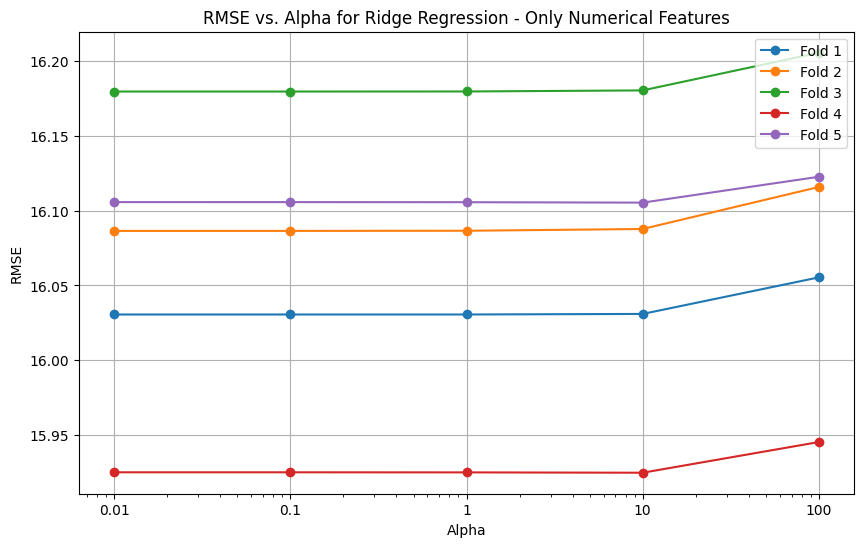

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmses, marker='o', linestyle='-')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs. Alpha for Ridge Regression - Only Numerical Features")
plt.xscale('log')  
plt.xticks(alphas, alphas)
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.grid(True)
plt.show()

ALL FEATURES

In [7]:
complete = pd.read_csv('data/complete.csv')
X2, y2 = complete.iloc[:, :-1], complete['popularity']

In [8]:
ridge_reg2 = ridge.RidgeRegression(alpha=1, n_splits=5, random_state=51)
ridge_reg2.fit(X2, y2)
print(ridge_reg2.rmse)

[3.43 3.42 3.49 3.43 3.41]


In [9]:
alphas2 = []
rmses2 = []
coefficients2 = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge_reg2 = ridge.RidgeRegression(alpha=alpha, n_splits=5, random_state=51)
    ridge_reg2.fit(X2, y2)

    rmse2 = ridge_reg2.rmse
    coeffs2 = ridge_reg2.weights

    alphas2.append(alpha)
    rmses2.append(rmse2)
    coefficients2.append(coeffs2)

alphas2, rmses2, coefficients2

([0.01, 0.1, 1, 10, 100],
 [array([3.43, 3.42, 3.49, 3.43, 3.41]),
  array([3.43, 3.42, 3.49, 3.43, 3.41]),
  array([3.43, 3.42, 3.49, 3.43, 3.41]),
  array([3.43, 3.42, 3.49, 3.43, 3.41]),
  array([3.43, 3.42, 3.49, 3.43, 3.41])],
 [array([-0.46, 0.00, 0.13, 0.04, 0.28, 0.00, -0.00, 0.00, -0.37, 0.17,
         -0.09, -0.10, 0.10, 0.00, 0.02, 0.98, 0.02, -0.00]),
  array([-0.46, 0.00, 0.13, 0.04, 0.28, 0.00, -0.00, 0.00, -0.37, 0.17,
         -0.09, -0.10, 0.10, 0.00, 0.02, 0.98, 0.02, -0.00]),
  array([-0.45, 0.00, 0.13, 0.04, 0.28, 0.00, -0.00, 0.00, -0.37, 0.16,
         -0.09, -0.10, 0.10, 0.00, 0.02, 0.98, 0.02, -0.00]),
  array([-0.44, 0.00, 0.13, 0.03, 0.27, 0.00, 0.00, 0.00, -0.36, 0.16,
         -0.09, -0.10, 0.10, 0.00, 0.02, 0.98, 0.02, -0.00]),
  array([-0.32, 0.00, 0.12, 0.01, 0.21, 0.00, 0.00, -0.00, -0.31, 0.14,
         -0.08, -0.10, 0.11, 0.00, 0.02, 0.98, 0.02, -0.00])])

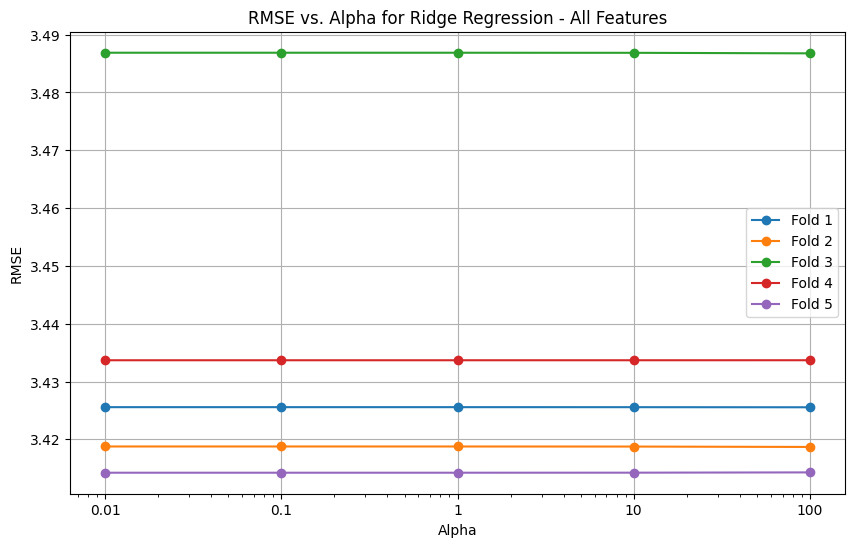

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(alphas2, rmses2, marker='o', linestyle='-')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs. Alpha for Ridge Regression - All Features")
plt.xscale('log')  
plt.xticks(alphas2, alphas2)
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.grid(True)
plt.show()